# Covid 19 forecasting
## Data validation (Daily cases)

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
data_frame=pd.read_csv('deceased_data.csv')

In [10]:
data_frame.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15-Mar-20,2020-03-15,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16-Mar-20,2020-03-16,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17-Mar-20,2020-03-17,Deceased,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18-Mar-20,2020-03-18,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
stationary_cols=[]
non_stationary_cols=[]

In [13]:
#h0=It is not stationary
#h1=It is stationary
def adfuller_test(data):
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    for lab,val in zip(labels,results[:4]):
        print('{} : {}'.format(lab,val))
    print('---------------------------------------------------')   
    print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        stationary_cols.append(data.name)
    else:
        print('Accecpt h0')
        print(h0)
        print('Strong evidence that the given data is not stationary')
        non_stationary_cols.append(data.name)

In [14]:
data_frame['TT'].name

'TT'

In [15]:
#adfuller test for total cases
adfuller_test(data_frame['TT'])

test_statistic : -2.5043155770759467
p value : 0.1144278262018843
lags used : 18
number of observations used : 552
---------------------------------------------------
p value 0.1144278262018843
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


In [16]:
#adfuller test for the features of different regions
for cols in data_frame.columns[4:]:
    print('Test for ',cols)
    adfuller_test(data_frame[cols])
    print('-------------------------------------------------------------------------------')

Test for  AN
test_statistic : -3.4784379893036963
p value : 0.00855843043076755
lags used : 16
number of observations used : 554
---------------------------------------------------
p value 0.00855843043076755
Reject h0
It is stationary
Weak evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  AP
test_statistic : -2.8326905678819783
p value : 0.05375374692079723
lags used : 11
number of observations used : 559
---------------------------------------------------
p value 0.05375374692079723
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  AR
test_statistic : -2.167994682008687
p value : 0.2180658708600004
lags used : 15
number of observations used : 555
---------------------------------------------------
p value 0.2180658708600004
Accecpt h0
It is not stationary
Strong evidence tha

test_statistic : -2.510403777876955
p value : 0.11296345081682324
lags used : 12
number of observations used : 558
---------------------------------------------------
p value 0.11296345081682324
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  OR
test_statistic : -1.7508240668588124
p value : 0.40513472784908994
lags used : 2
number of observations used : 568
---------------------------------------------------
p value 0.40513472784908994
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  PY
test_statistic : -4.373037047658945
p value : 0.00033120138461537334
lags used : 15
number of observations used : 555
---------------------------------------------------
p value 0.00033120138461537334
Reject h0
It is stationary
Weak evidence that the g

In [17]:
print(stationary_cols)
print('--------------------------')
print(non_stationary_cols)

['AN', 'AS', 'BR', 'CT', 'DN', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'LA', 'MP', 'MH', 'PY', 'PB', 'RJ', 'TN', 'UP', 'UT', 'WB']
--------------------------
['TT', 'AP', 'AR', 'CH', 'DD', 'KL', 'LD', 'MN', 'ML', 'MZ', 'NL', 'OR', 'SK', 'TG', 'TR', 'UN']


In [18]:
#h0=It is not stationary
#h1=It is stationary
def repeat_adfuller_test(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    for lab,val in zip(labels,results[:4]):
        print('{} : {}'.format(lab,val))
    print('---------------------------------------------------')   
    print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    else:
        print('Accecpt h0')
        print(h0)
        print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)
    return cols_after_differencing

Test for  TT
test_statistic : -2.498371099055899
p value : 0.1158711571688959
lags used : 18
number of observations used : 545
---------------------------------------------------
p value 0.1158711571688959
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


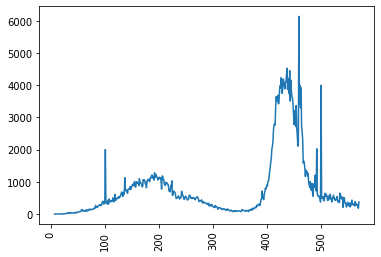

---------------------------------------------------------------------
Test for  AP
test_statistic : -2.812712214557619
p value : 0.05648073717592851
lags used : 11
number of observations used : 552
---------------------------------------------------
p value 0.05648073717592851
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


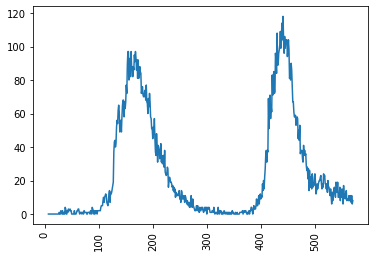

---------------------------------------------------------------------
Test for  AR
test_statistic : -2.159227451391635
p value : 0.2213747767666973
lags used : 15
number of observations used : 548
---------------------------------------------------
p value 0.2213747767666973
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


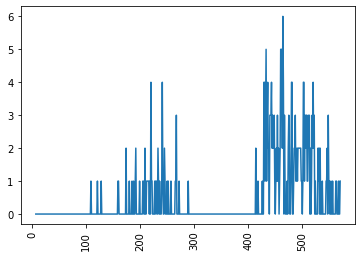

---------------------------------------------------------------------
Test for  CH
test_statistic : -2.223997919911912
p value : 0.19765116069962624
lags used : 6
number of observations used : 557
---------------------------------------------------
p value 0.19765116069962624
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


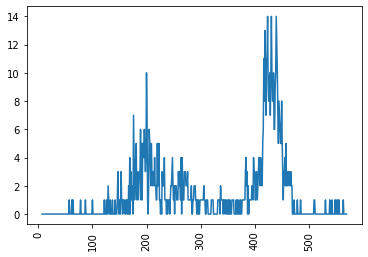

---------------------------------------------------------------------
Test for  DD
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 563
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


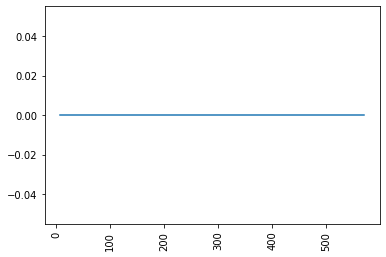

---------------------------------------------------------------------
Test for  KL
test_statistic : -1.4225113501067255
p value : 0.5714375880094608
lags used : 18
number of observations used : 545
---------------------------------------------------
p value 0.5714375880094608
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


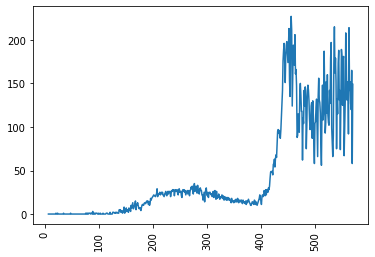

---------------------------------------------------------------------
Test for  LD
test_statistic : -2.130639108653827
p value : 0.23237423007446018
lags used : 16
number of observations used : 547
---------------------------------------------------
p value 0.23237423007446018
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


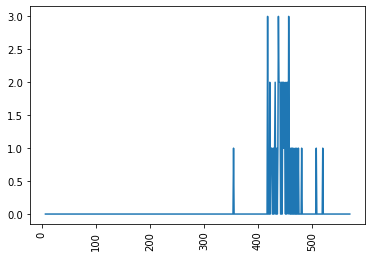

---------------------------------------------------------------------
Test for  MN
test_statistic : -2.3082245164433317
p value : 0.16932912043406967
lags used : 19
number of observations used : 544
---------------------------------------------------
p value 0.16932912043406967
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


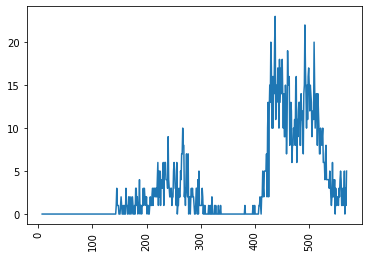

---------------------------------------------------------------------
Test for  ML
test_statistic : -2.648473692681885
p value : 0.08338676169223097
lags used : 12
number of observations used : 551
---------------------------------------------------
p value 0.08338676169223097
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


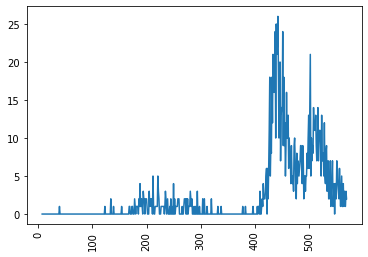

---------------------------------------------------------------------
Test for  MZ
test_statistic : 1.900994076980829
p value : 0.9985296165766281
lags used : 18
number of observations used : 545
---------------------------------------------------
p value 0.9985296165766281
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


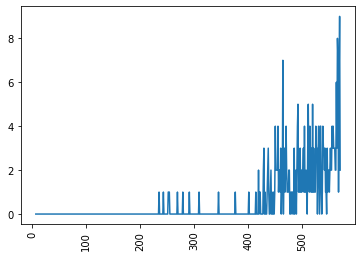

---------------------------------------------------------------------
Test for  NL
test_statistic : -2.49965791587836
p value : 0.1155575797071452
lags used : 12
number of observations used : 551
---------------------------------------------------
p value 0.1155575797071452
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


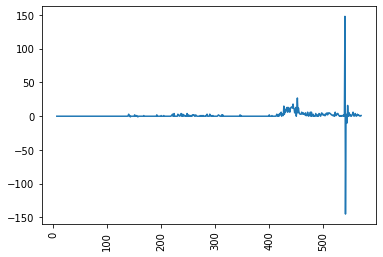

---------------------------------------------------------------------
Test for  OR
test_statistic : -1.7653035984514185
p value : 0.39781839796608864
lags used : 2
number of observations used : 561
---------------------------------------------------
p value 0.39781839796608864
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


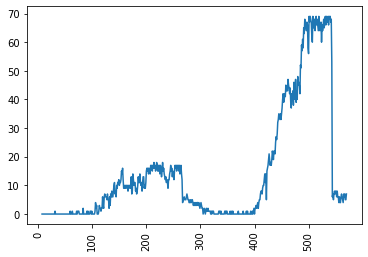

---------------------------------------------------------------------
Test for  SK
test_statistic : -2.553057241551001
p value : 0.10309260414695914
lags used : 15
number of observations used : 548
---------------------------------------------------
p value 0.10309260414695914
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


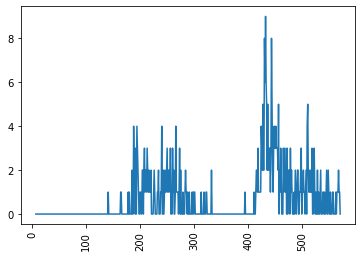

---------------------------------------------------------------------
Test for  TG
test_statistic : -2.3329258083707245
p value : 0.1615684873745334
lags used : 18
number of observations used : 545
---------------------------------------------------
p value 0.1615684873745334
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


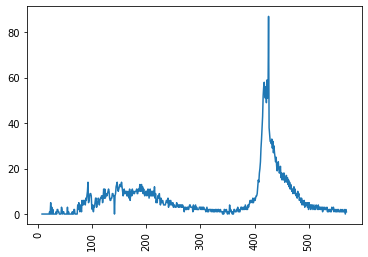

---------------------------------------------------------------------
Test for  TR
test_statistic : -2.291262827199505
p value : 0.17480136981526234
lags used : 12
number of observations used : 551
---------------------------------------------------
p value 0.17480136981526234
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


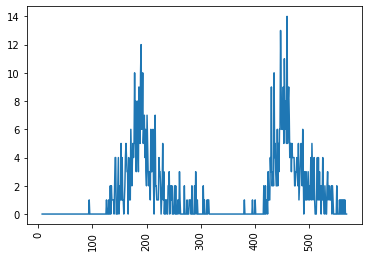

---------------------------------------------------------------------
Test for  UN
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 563
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


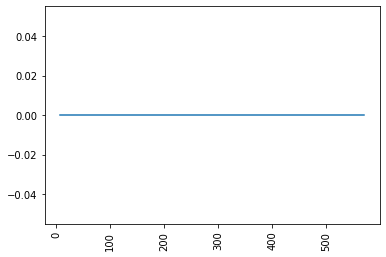

---------------------------------------------------------------------


In [19]:
#repeating adfuller test for the features which are not stationary.
for cols in non_stationary_cols:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(7)
    repeat_adfuller_test(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------------------------------------------------')

In [20]:
from pandas.plotting import autocorrelation_plot

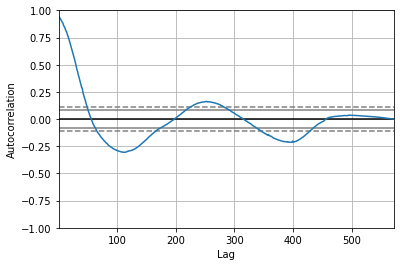

In [21]:
autocorrelation_plot(data_frame['TT']);

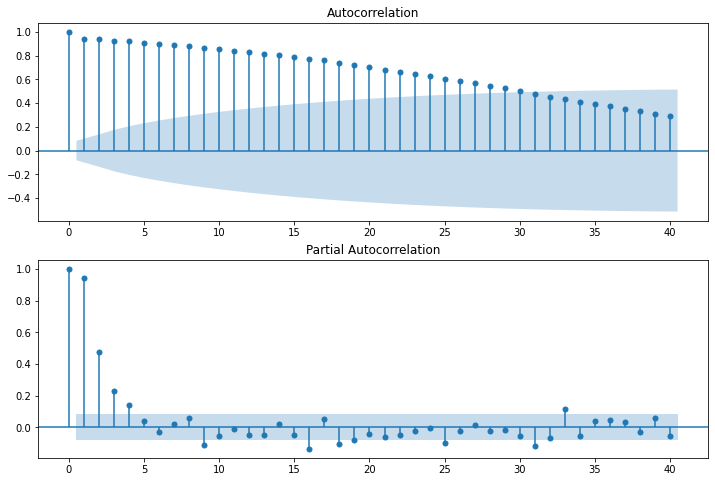

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_frame['TT'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_frame['TT'],lags=40,ax=ax2)

In [23]:
#30 day difference
data=data_frame.copy()

In [24]:
data['new_tt']=data['TT'].shift(7)

In [25]:
data.head(20)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,RJ,SK,TN,TG,TR,UP,UT,WB,UN,new_tt
0,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,15-Mar-20,2020-03-15,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,16-Mar-20,2020-03-16,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,17-Mar-20,2020-03-17,Deceased,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,18-Mar-20,2020-03-18,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5,19-Mar-20,2020-03-19,Deceased,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
6,20-Mar-20,2020-03-20,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7,21-Mar-20,2020-03-21,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
8,22-Mar-20,2020-03-22,Deceased,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
9,23-Mar-20,2020-03-23,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


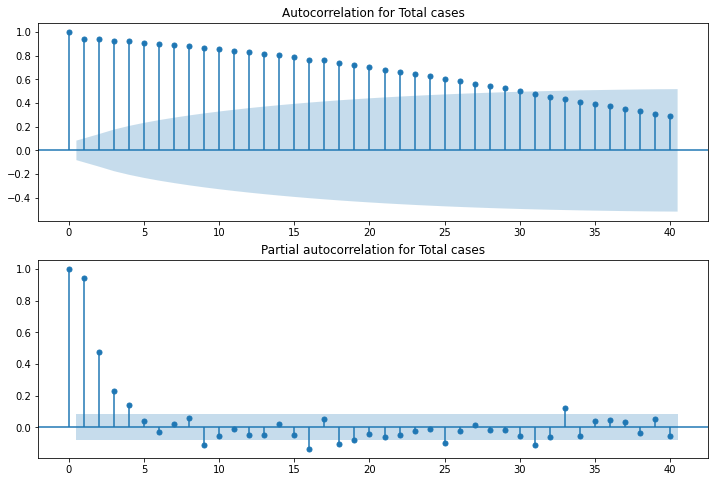

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['new_tt'].iloc[7:],lags=40,ax=ax1,title='Autocorrelation for Total cases')
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['new_tt'].iloc[7:],lags=40,ax=ax2,title='Partial autocorrelation for Total cases')

In [27]:
short_forms=[]
for i in data_frame.columns[4:]:
    short_forms.append(i)

In [28]:
abbreviations=['Andaman and Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh',
              'Dadra and Nagar Haveli','Daman and Diu','Delhi','Goa','Gujarat','Haryana',
              'Himachal Pradesh','Jammu and Kashmir','Jharkhand','Karnataka','Kerala','Ladakh','Lakshadweep',
              'Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Orissa','Pondicherry',
              'Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand',
              'West Bengal','Union Territories']

## Plotting all the features of different that are not classified as stationary or non-stationary data.

ACF and PACF for  Andaman and Nicobar Islands


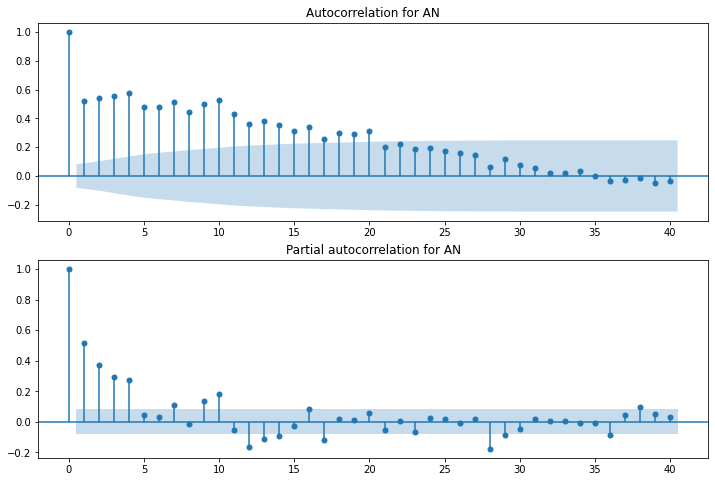

----------------------------------------------------------------------------------------------
ACF and PACF for  Andhra Pradesh


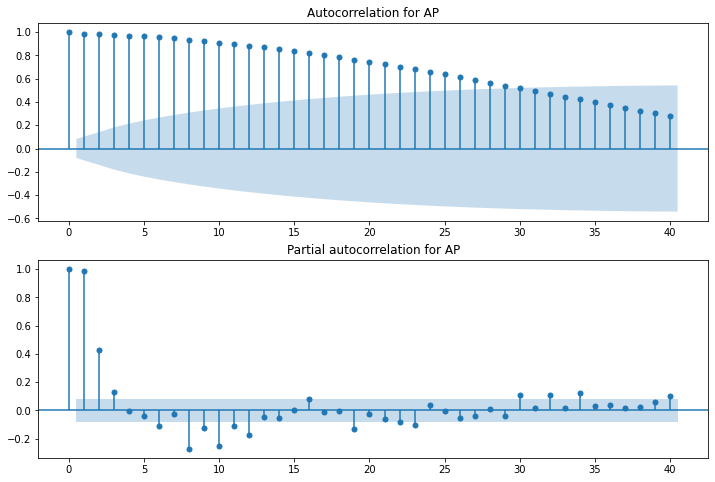

----------------------------------------------------------------------------------------------
ACF and PACF for  Arunachal Pradesh


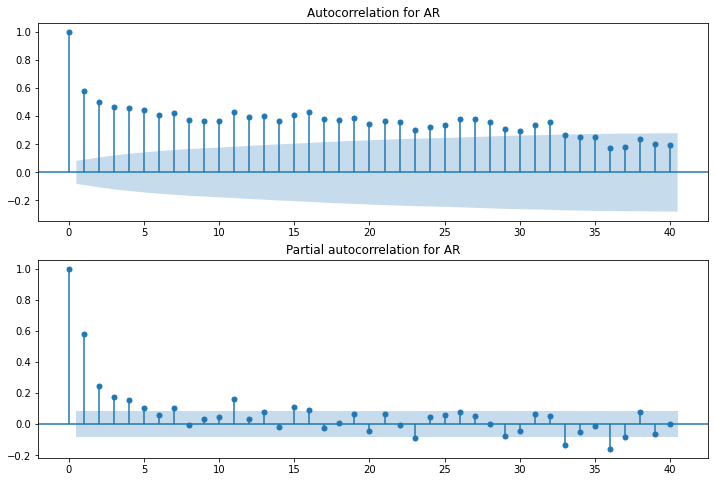

----------------------------------------------------------------------------------------------
ACF and PACF for  Assam


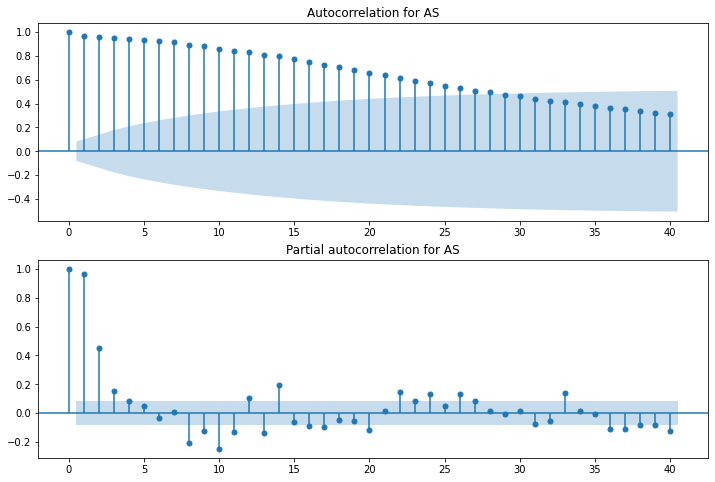

----------------------------------------------------------------------------------------------
ACF and PACF for  Bihar


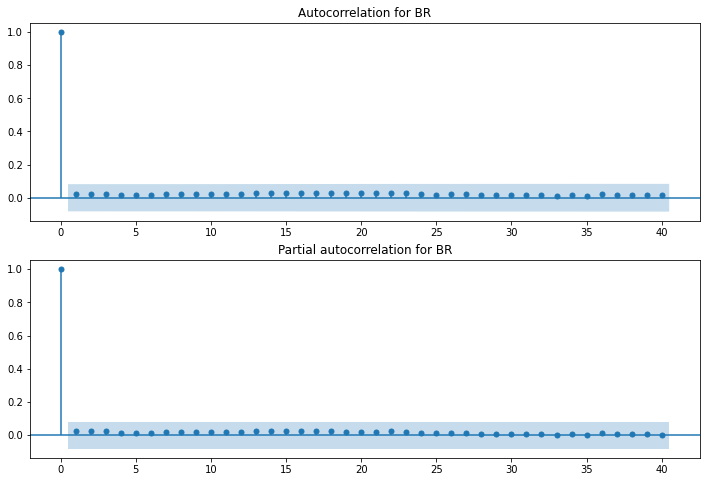

----------------------------------------------------------------------------------------------
ACF and PACF for  Chandigarh


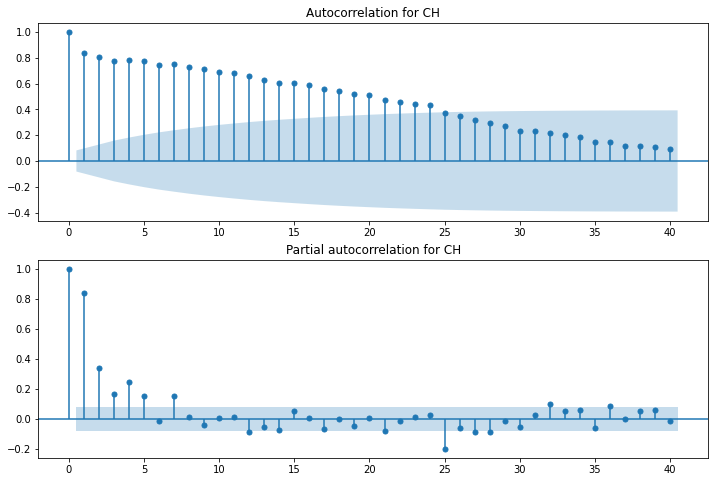

----------------------------------------------------------------------------------------------
ACF and PACF for  Chhattisgarh


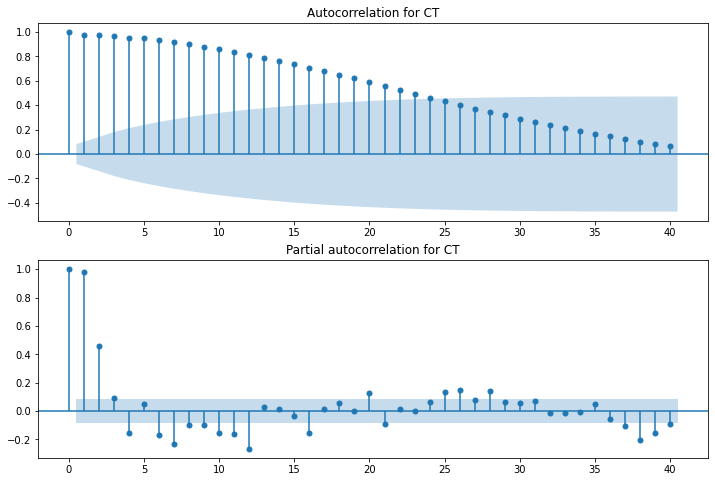

----------------------------------------------------------------------------------------------
ACF and PACF for  Dadra and Nagar Haveli


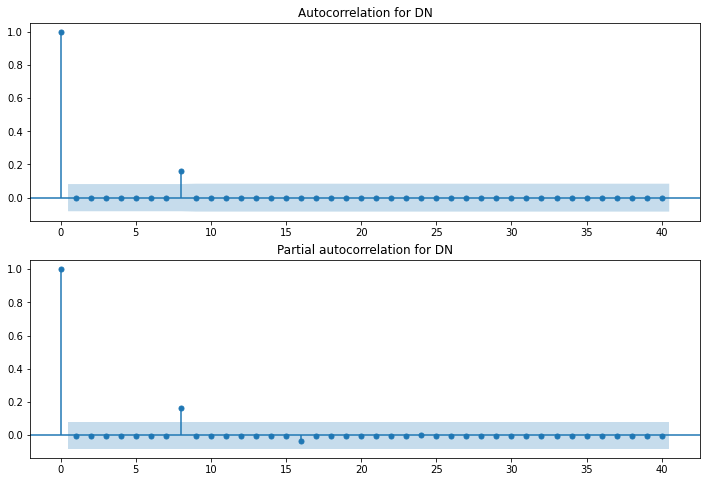

----------------------------------------------------------------------------------------------
ACF and PACF for  Daman and Diu
This feature cannot be plotted for autocorrelation and partial autocorrelation
----------------------------------------------------------------------------------------------
ACF and PACF for  Delhi


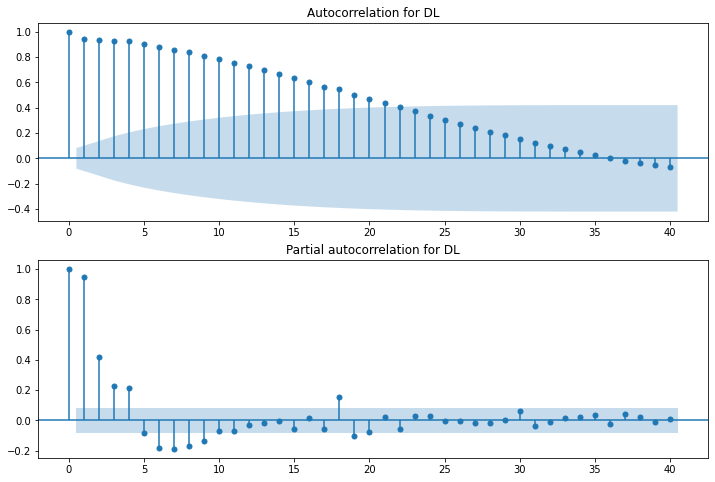

----------------------------------------------------------------------------------------------
ACF and PACF for  Goa


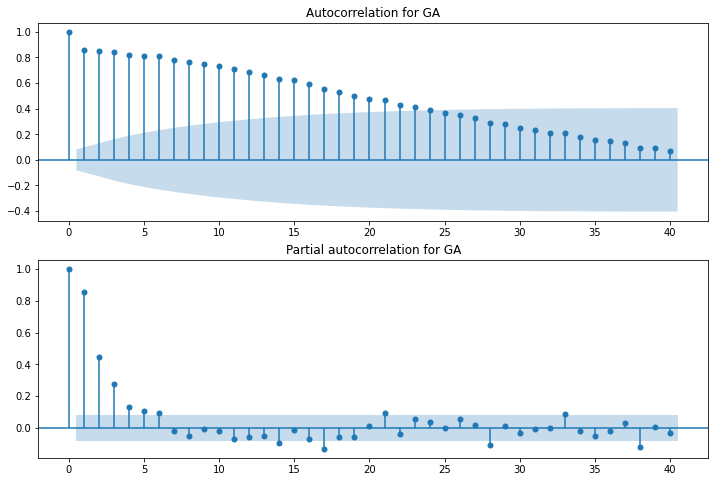

----------------------------------------------------------------------------------------------
ACF and PACF for  Gujarat


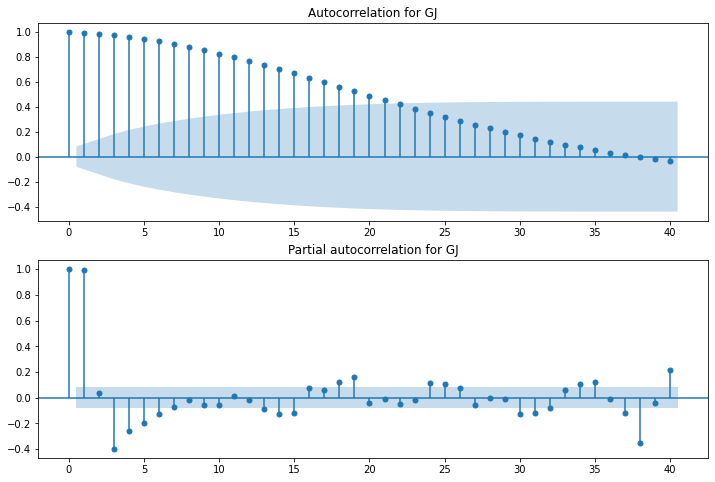

----------------------------------------------------------------------------------------------
ACF and PACF for  Haryana


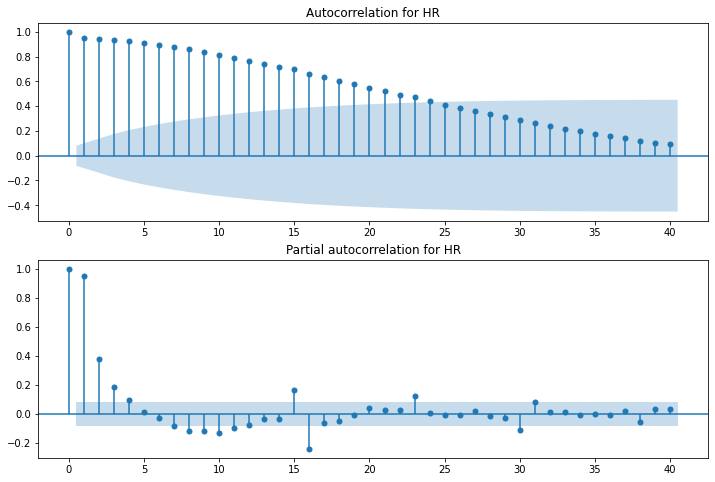

----------------------------------------------------------------------------------------------
ACF and PACF for  Himachal Pradesh


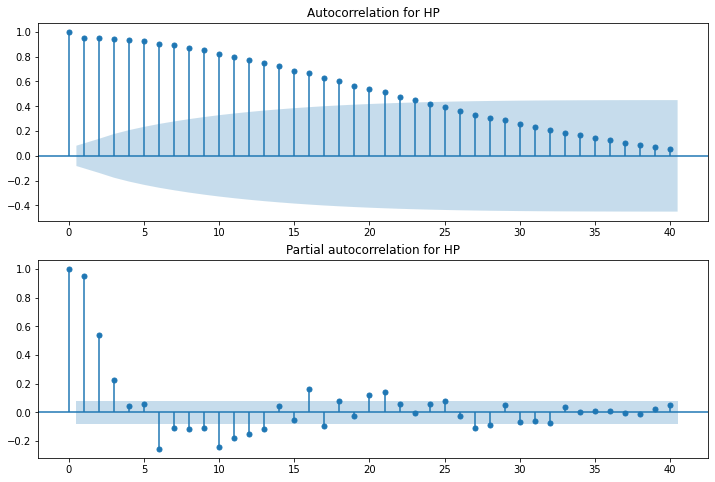

----------------------------------------------------------------------------------------------
ACF and PACF for  Jammu and Kashmir


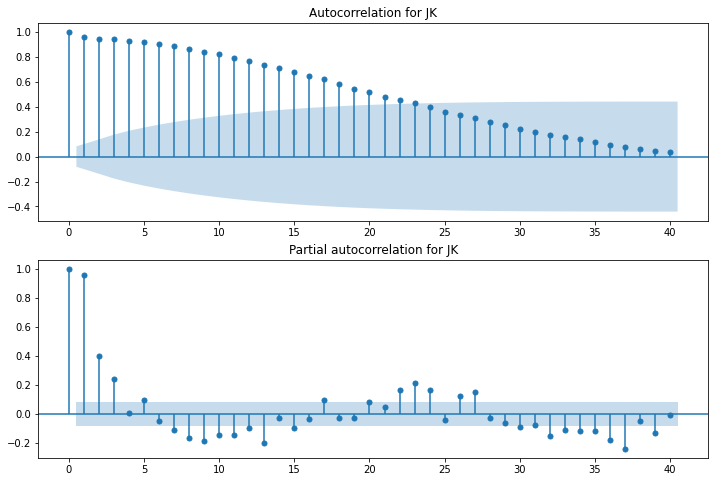

----------------------------------------------------------------------------------------------
ACF and PACF for  Jharkhand


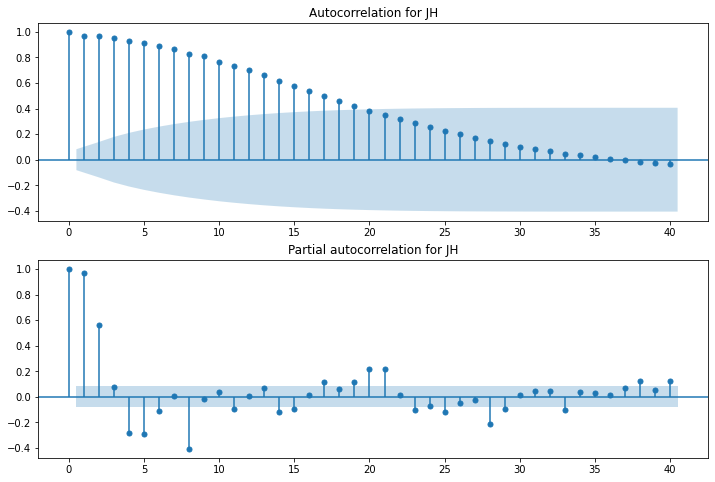

----------------------------------------------------------------------------------------------
ACF and PACF for  Karnataka


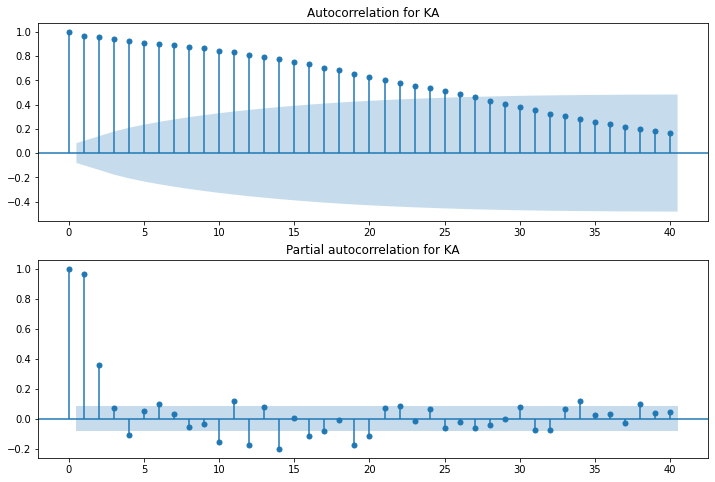

----------------------------------------------------------------------------------------------
ACF and PACF for  Kerala


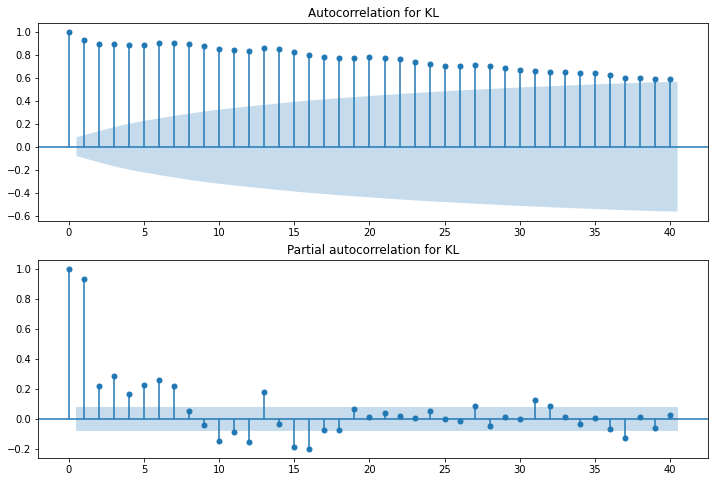

----------------------------------------------------------------------------------------------
ACF and PACF for  Ladakh


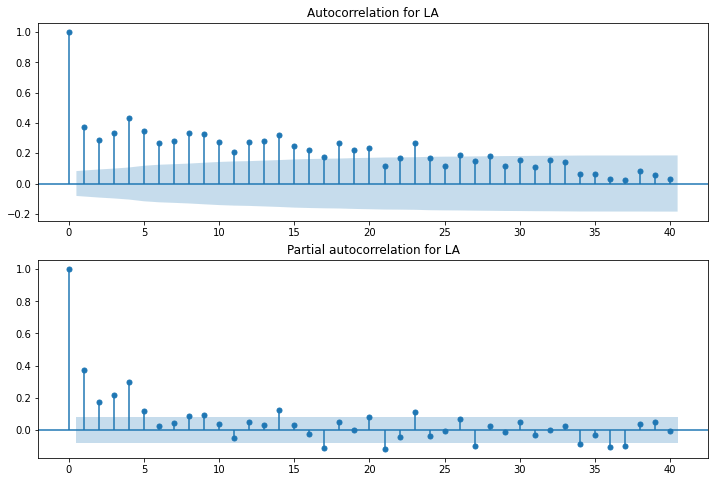

----------------------------------------------------------------------------------------------
ACF and PACF for  Lakshadweep


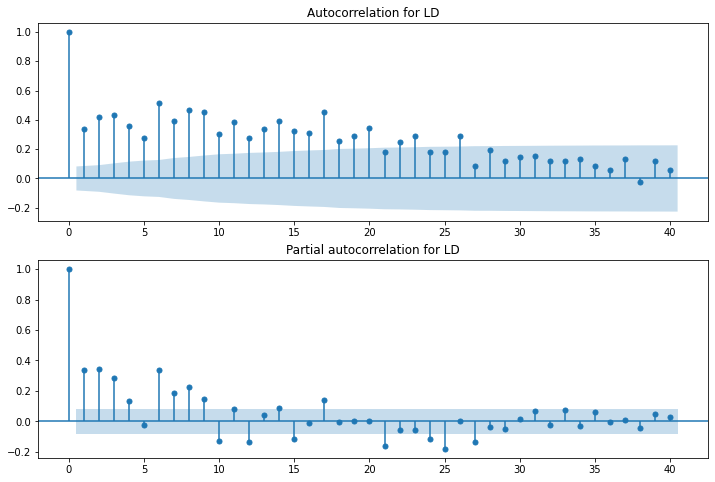

----------------------------------------------------------------------------------------------
ACF and PACF for  Madhya Pradesh


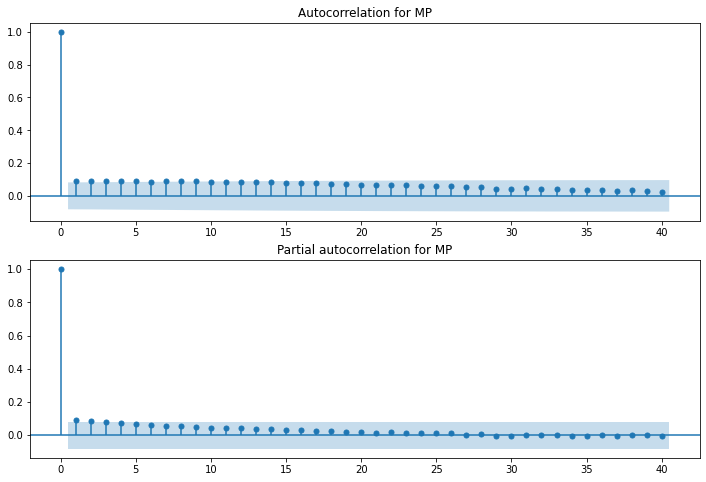

----------------------------------------------------------------------------------------------
ACF and PACF for  Maharashtra


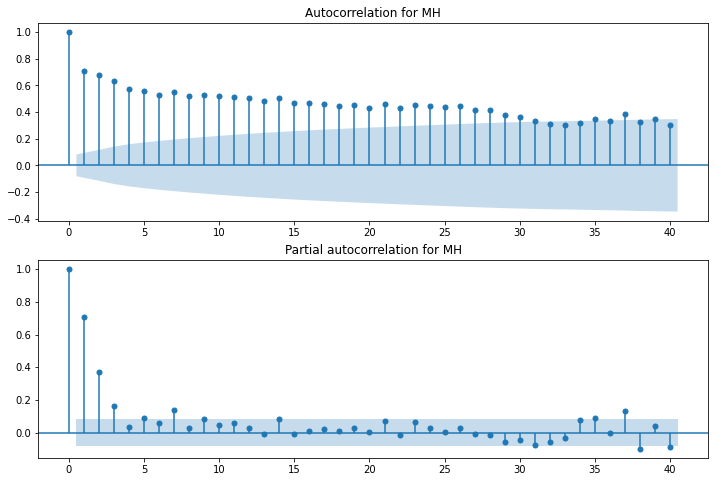

----------------------------------------------------------------------------------------------
ACF and PACF for  Manipur


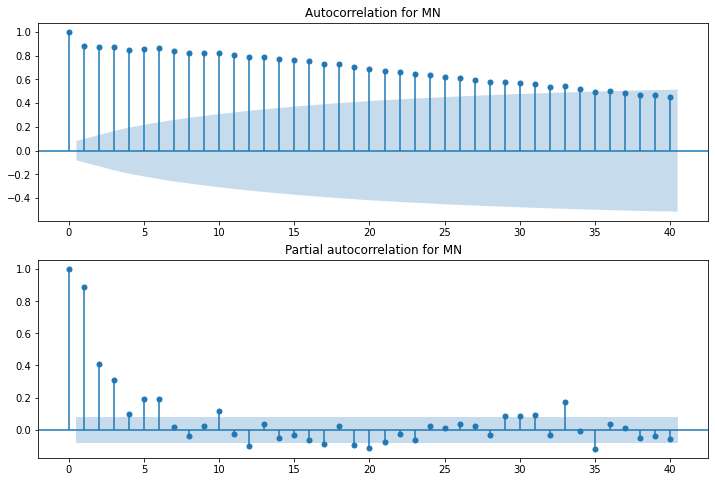

----------------------------------------------------------------------------------------------
ACF and PACF for  Meghalaya


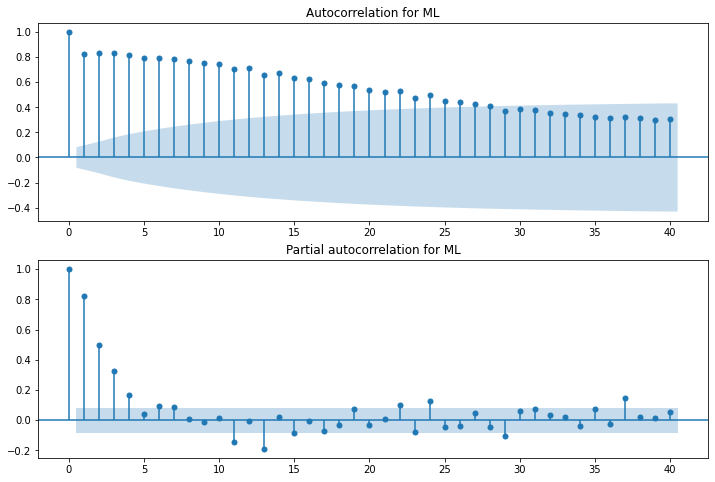

----------------------------------------------------------------------------------------------
ACF and PACF for  Mizoram


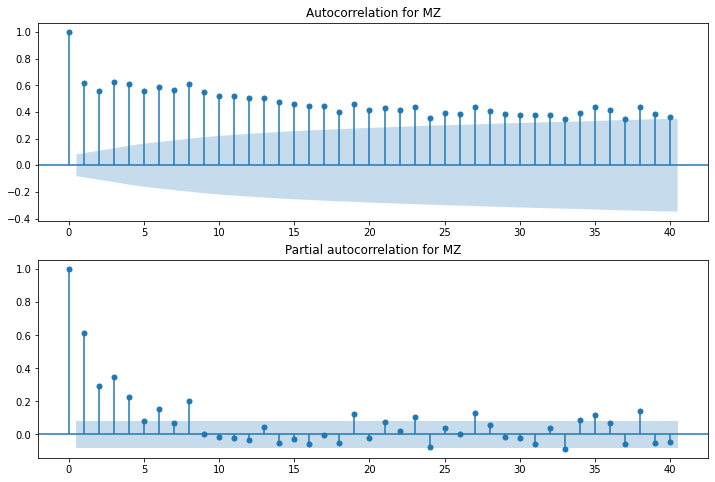

----------------------------------------------------------------------------------------------
ACF and PACF for  Nagaland


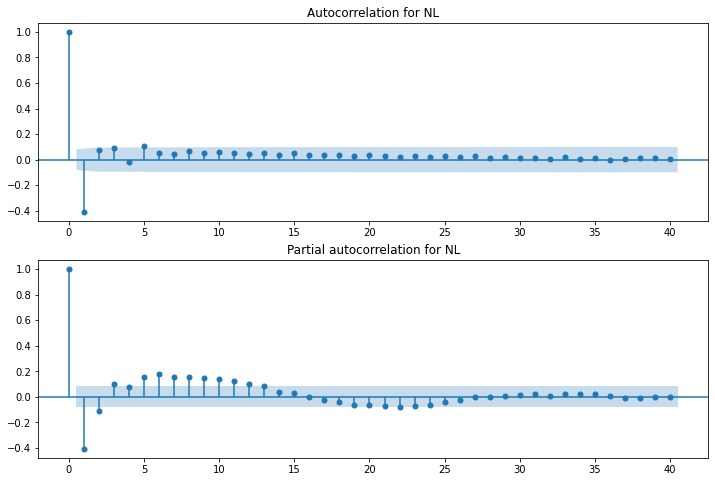

----------------------------------------------------------------------------------------------
ACF and PACF for  Orissa


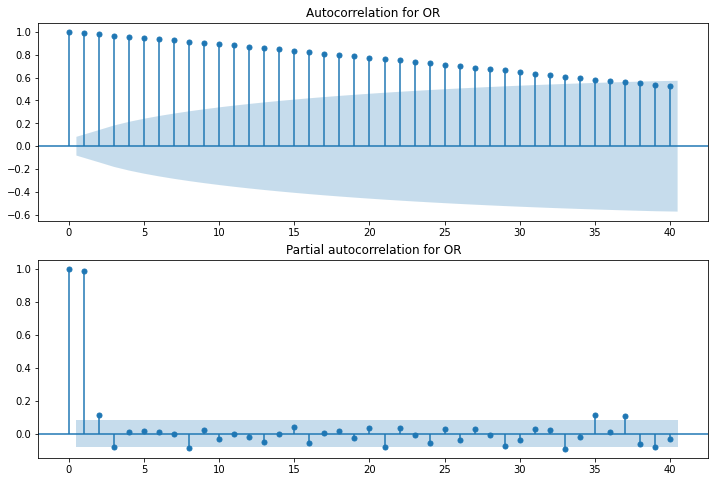

----------------------------------------------------------------------------------------------
ACF and PACF for  Pondicherry


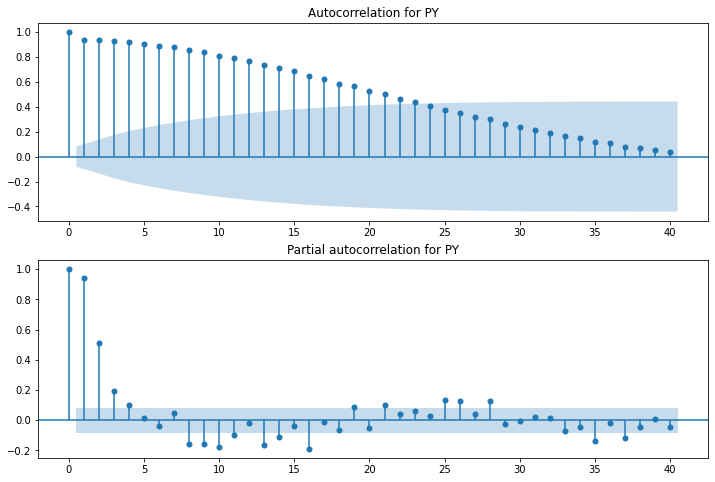

----------------------------------------------------------------------------------------------
ACF and PACF for  Punjab


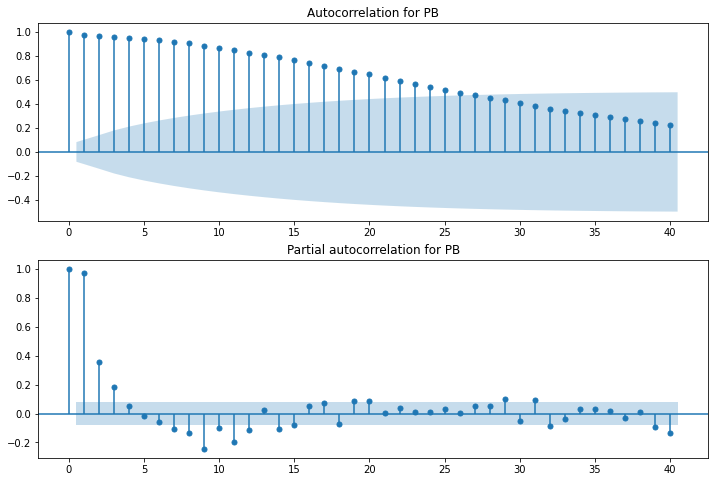

----------------------------------------------------------------------------------------------
ACF and PACF for  Rajasthan


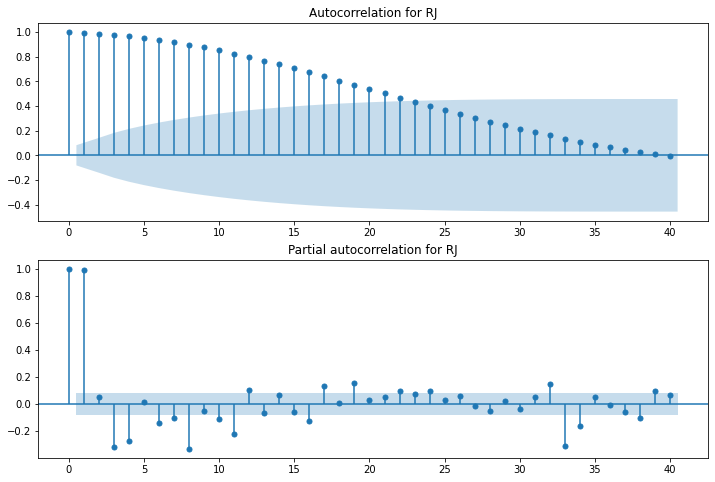

----------------------------------------------------------------------------------------------
ACF and PACF for  Sikkim


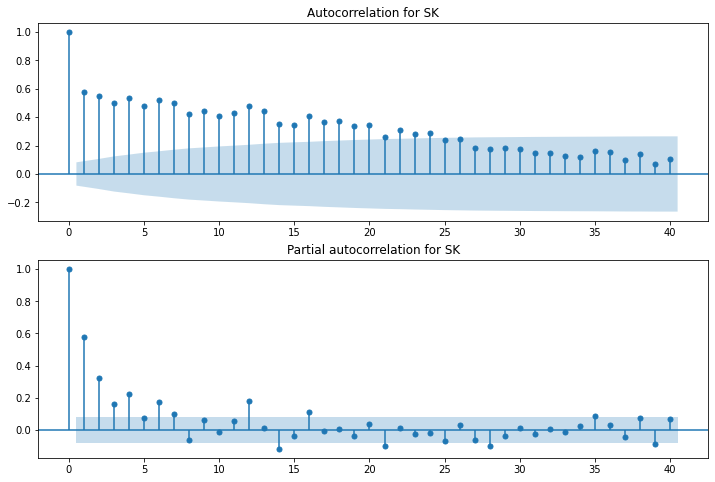

----------------------------------------------------------------------------------------------
ACF and PACF for  Tamil Nadu


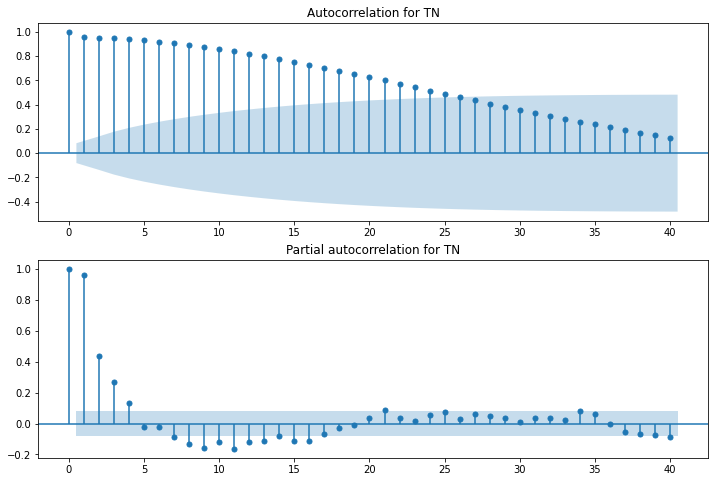

----------------------------------------------------------------------------------------------
ACF and PACF for  Telangana


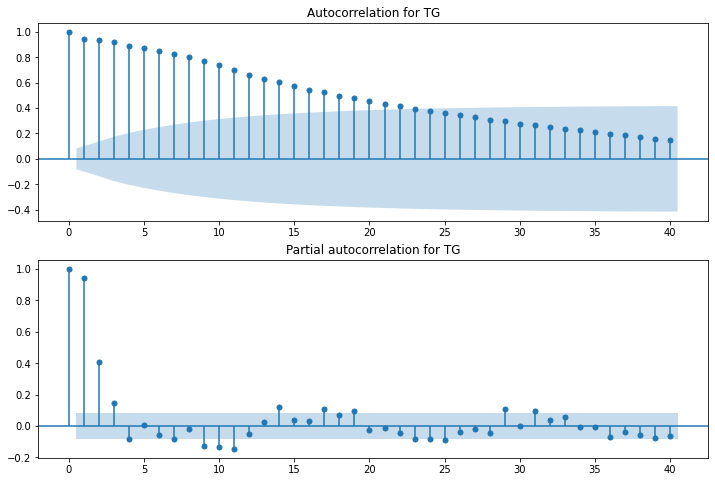

----------------------------------------------------------------------------------------------
ACF and PACF for  Tripura


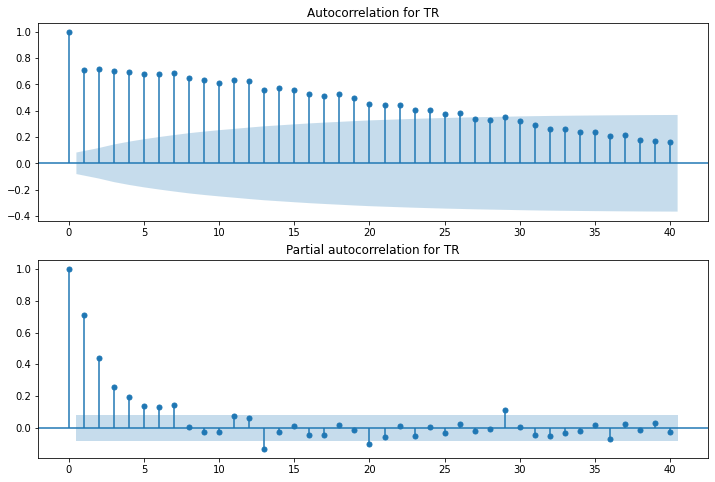

----------------------------------------------------------------------------------------------
ACF and PACF for  Uttar Pradesh


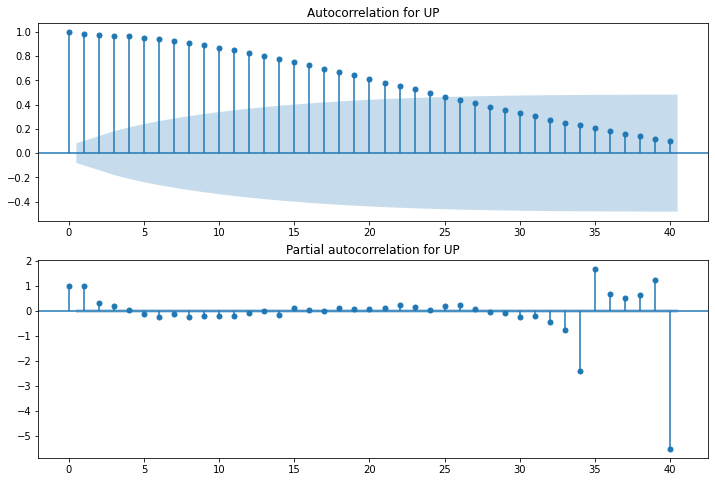

----------------------------------------------------------------------------------------------
ACF and PACF for  Uttarakhand


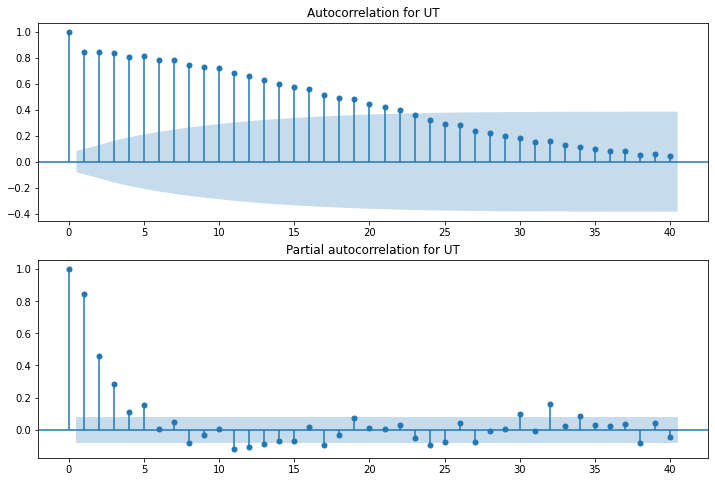

----------------------------------------------------------------------------------------------
ACF and PACF for  West Bengal


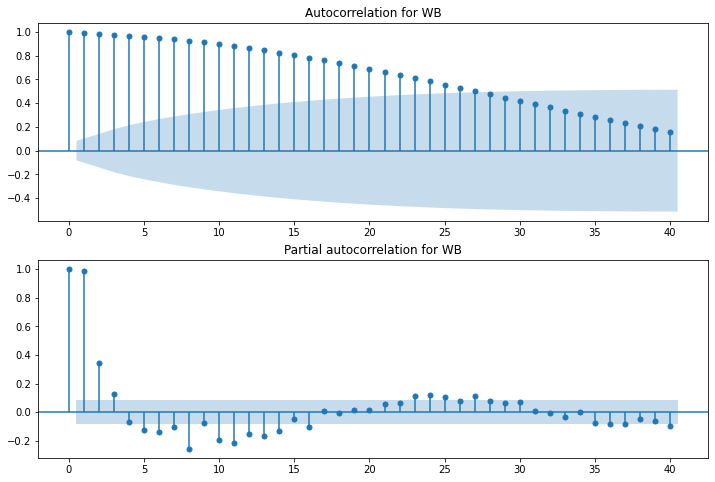

----------------------------------------------------------------------------------------------
ACF and PACF for  Union Territories
This feature cannot be plotted for autocorrelation and partial autocorrelation
----------------------------------------------------------------------------------------------


In [29]:
#plotting acf and pacf plots for region or state columns
for i in range(0,len(short_forms)):
    print('ACF and PACF for ',abbreviations[i])
    if (short_forms[i]!='DD'):
        if short_forms[i]!='UN':
            cols=short_forms[i]
            fig = plt.figure(figsize=(12,8))
            ax1 = fig.add_subplot(211)
            fig = plot_acf(data_frame[cols],lags=40,ax=ax1,title='Autocorrelation for '+cols)
            ax2 = fig.add_subplot(212)
            fig = plot_pacf(data_frame[cols],lags=40,ax=ax2,title='Partial autocorrelation for '+cols)
            plt.show()
        
        else:
            #'DD' feature cannot be plotted for acf and pacf due to the inconsistent values in it. It does not contain any value to plot
            print('This feature cannot be plotted for autocorrelation and partial autocorrelation')
    else:
        #'DD' feature cannot be plotted for acf and pacf due to the inconsistent values in it. It does not contain any value to plot
        print('This feature cannot be plotted for autocorrelation and partial autocorrelation')
    print('----------------------------------------------------------------------------------------------')

## Differencing the data and repeating the adfuller test for the features which are not stationary.

Test for  TT
test_statistic : -2.4623856841440817
p value : 0.12489652996703154
lags used : 18
number of observations used : 512
---------------------------------------------------
p value 0.12489652996703154
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


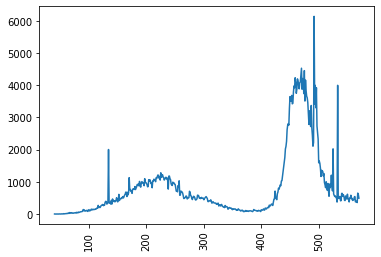

---------------------------------------------------------------------
Test for  AP
test_statistic : -2.8099103488445873
p value : 0.05687203035340338
lags used : 11
number of observations used : 519
---------------------------------------------------
p value 0.05687203035340338
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


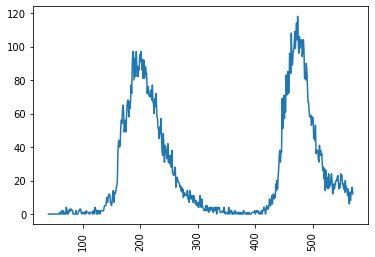

---------------------------------------------------------------------
Test for  AR
test_statistic : -2.0517816275165472
p value : 0.26433991692909653
lags used : 15
number of observations used : 515
---------------------------------------------------
p value 0.26433991692909653
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


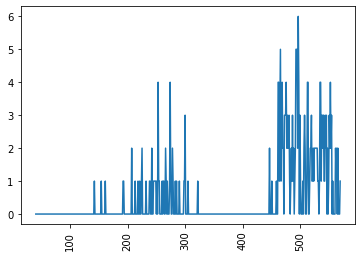

---------------------------------------------------------------------
Test for  CH
test_statistic : -2.1725989274515953
p value : 0.21634031957112854
lags used : 6
number of observations used : 524
---------------------------------------------------
p value 0.21634031957112854
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


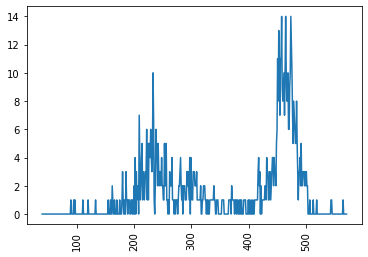

---------------------------------------------------------------------
Test for  DD
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 530
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


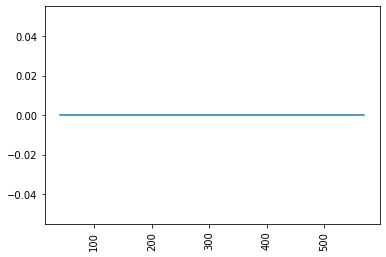

---------------------------------------------------------------------
Test for  KL
test_statistic : -0.9645530124439347
p value : 0.7659723003954435
lags used : 19
number of observations used : 511
---------------------------------------------------
p value 0.7659723003954435
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


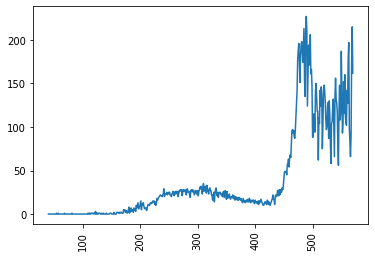

---------------------------------------------------------------------
Test for  LD
test_statistic : -2.0722033570955225
p value : 0.25583763435338724
lags used : 16
number of observations used : 514
---------------------------------------------------
p value 0.25583763435338724
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


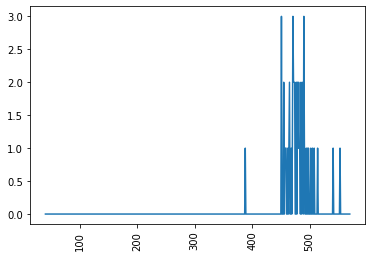

---------------------------------------------------------------------
Test for  MN
test_statistic : -2.2334417168909115
p value : 0.19433264119210247
lags used : 19
number of observations used : 511
---------------------------------------------------
p value 0.19433264119210247
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


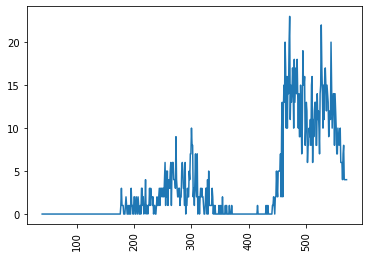

---------------------------------------------------------------------
Test for  ML
test_statistic : -2.5715823929076422
p value : 0.09901398892821067
lags used : 12
number of observations used : 518
---------------------------------------------------
p value 0.09901398892821067
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


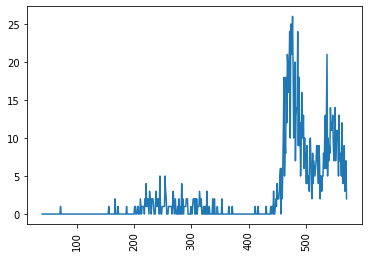

---------------------------------------------------------------------
Test for  MZ
test_statistic : -0.3652821020341242
p value : 0.9157360426796541
lags used : 18
number of observations used : 512
---------------------------------------------------
p value 0.9157360426796541
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


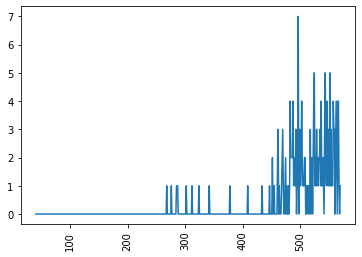

---------------------------------------------------------------------
Test for  NL
test_statistic : -3.7440744879093537
p value : 0.0035342286427303073
lags used : 17
number of observations used : 513
---------------------------------------------------
p value 0.0035342286427303073
Reject h0
It is stationary
Weak evidence that the given data is not stationary


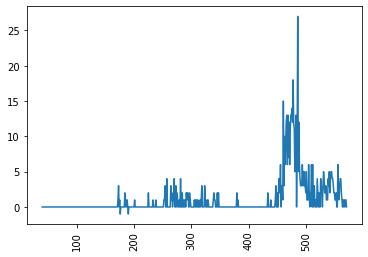

---------------------------------------------------------------------
Test for  OR
test_statistic : 1.2659193428463387
p value : 0.9964111292017721
lags used : 7
number of observations used : 523
---------------------------------------------------
p value 0.9964111292017721
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


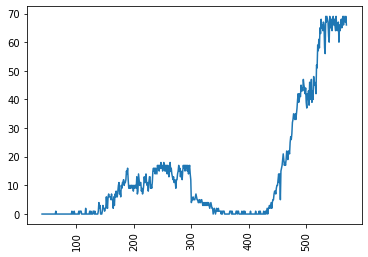

---------------------------------------------------------------------
Test for  SK
test_statistic : -2.451840758236191
p value : 0.12763585218905227
lags used : 15
number of observations used : 515
---------------------------------------------------
p value 0.12763585218905227
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


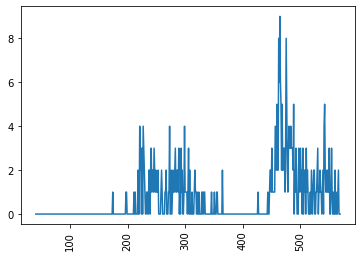

---------------------------------------------------------------------
Test for  TG
test_statistic : -2.2876626758204432
p value : 0.17597788263250508
lags used : 18
number of observations used : 512
---------------------------------------------------
p value 0.17597788263250508
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


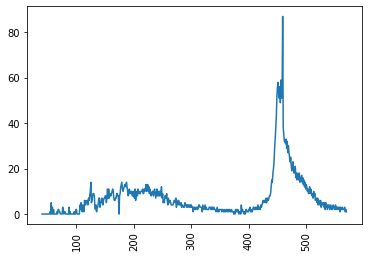

---------------------------------------------------------------------
Test for  TR
test_statistic : -2.2591934519582098
p value : 0.1854666954571989
lags used : 12
number of observations used : 518
---------------------------------------------------
p value 0.1854666954571989
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


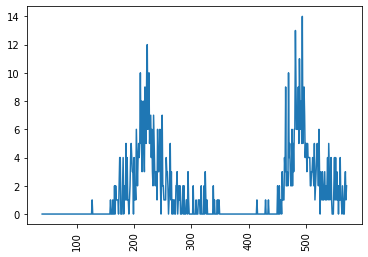

---------------------------------------------------------------------
Test for  UN
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 530
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


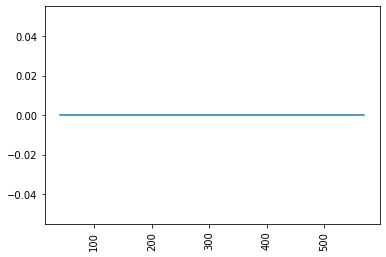

---------------------------------------------------------------------


In [30]:
#repeating adfuller test for the features which are not stationary.
for cols in non_stationary_cols:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(40)
    test=repeat_adfuller_test(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------------------------------------------------')

In [31]:
#function to find the features that can be stationary after differencing
def repeat_adfuller_test_cols_finding(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    #for lab,val in zip(labels,results[:4]):
    #    print('{} : {}'.format(lab,val))
    #print('---------------------------------------------------')   
    #print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    #else:
        #print('Accecpt h0')
        #print(h0)
        #print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)
    if len(cols_after_differencing)>0:
        print(cols_after_differencing)

In [32]:
#calling the function by iterating the shitf value from 0 to 100.
for i in range(0,100):
    #repeating adfuller test for the features which are not stationary.
    print('i: ',i)
    for cols in non_stationary_cols:
        #print('Test for ',cols)
        data=data_frame.copy()
        data[cols]=data[cols].shift(i)
        test=repeat_adfuller_test_cols_finding(data[cols].dropna())
        #data[cols].plot()
        #plt.xticks(rotation=90)
        #plt.show()
        #print('---------------------------------------------------------------------')
    #print(test)

i:  0
i:  1
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  2
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  3
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  4
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  5
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  6
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  14
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  15
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  16
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['AP']
i:  17
Reject h0
It is stationa

i:  76
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['NL']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['TG']
i:  77
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['NL']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['TG']
i:  78
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['NL']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['TG']
i:  79
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['NL']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['TG']
i:  80
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['NL']
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['TG']
i:  81
Reject h0
It is stationary
Weak evidence that the given data is not stationary
['NL']
Reject h0
It

In [33]:
#function for the cols that are transformed to stationary data after differencing
def repeat_adfuller_test_cols_transformed(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    
    if results[1]<=0.05:
        for lab,val in zip(labels,results[:4]):
            print('{} : {}'.format(lab,val))
        print('---------------------------------------------------')   
        print('p value',results[1])
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    #else:
        #print('Accecpt h0')
        #print(h0)
        #print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)

Test for  AN
test_statistic : -3.3046567637376274
p value : 0.014671595930737942
lags used : 16
number of observations used : 483
---------------------------------------------------
p value 0.014671595930737942
Reject h0
It is stationary
Weak evidence that the given data is not stationary


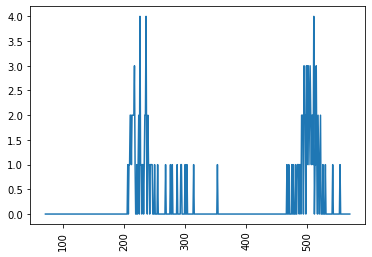

Plotting autocorrelation and partial autocorrelation for  AN


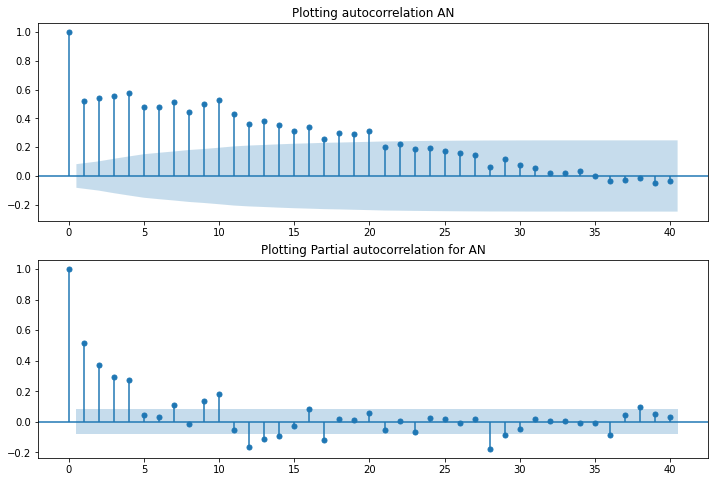

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  CH


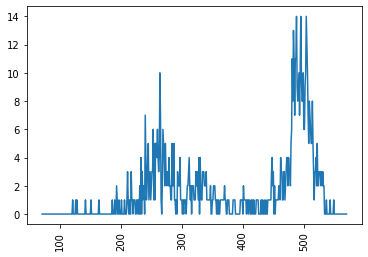

Plotting autocorrelation and partial autocorrelation for  CH


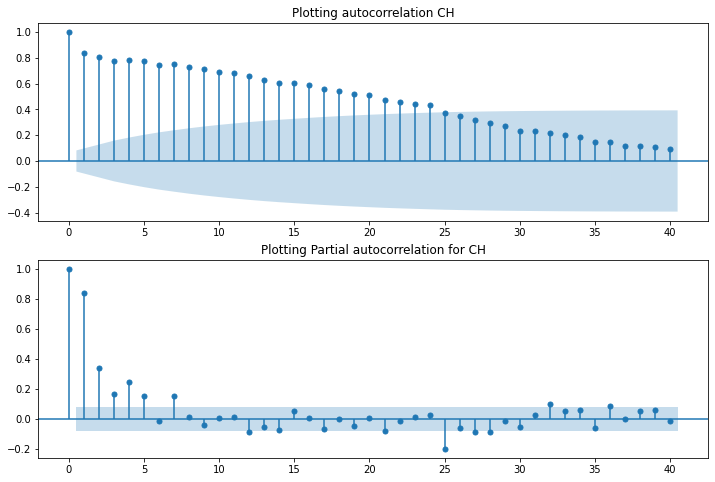

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  HR
test_statistic : -3.3284063293843085
p value : 0.013655486750684922
lags used : 9
number of observations used : 490
---------------------------------------------------
p value 0.013655486750684922
Reject h0
It is stationary
Weak evidence that the given data is not stationary


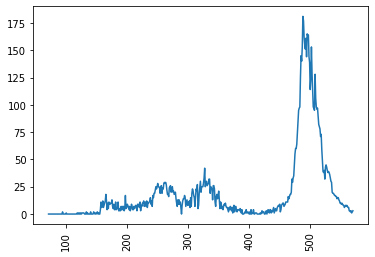

Plotting autocorrelation and partial autocorrelation for  HR


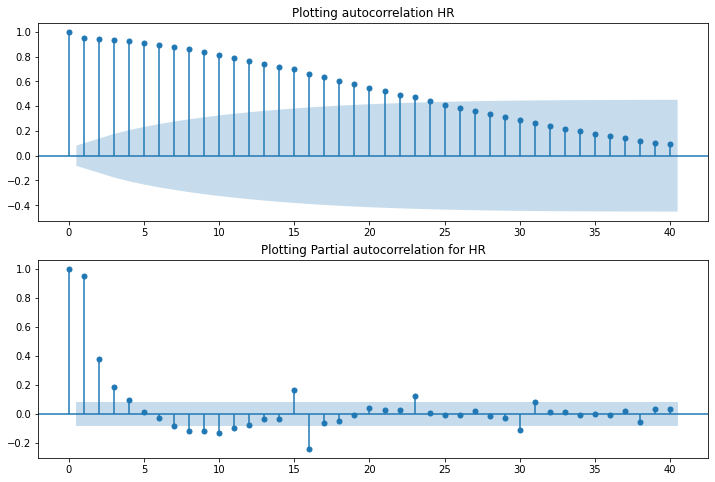

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  TG
test_statistic : -3.184350007084559
p value : 0.02090862263633593
lags used : 13
number of observations used : 486
---------------------------------------------------
p value 0.02090862263633593
Reject h0
It is stationary
Weak evidence that the given data is not stationary


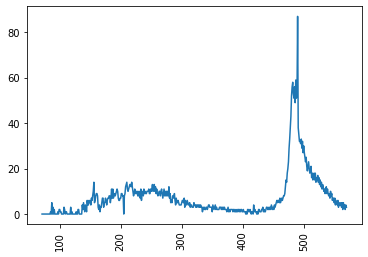

Plotting autocorrelation and partial autocorrelation for  TG


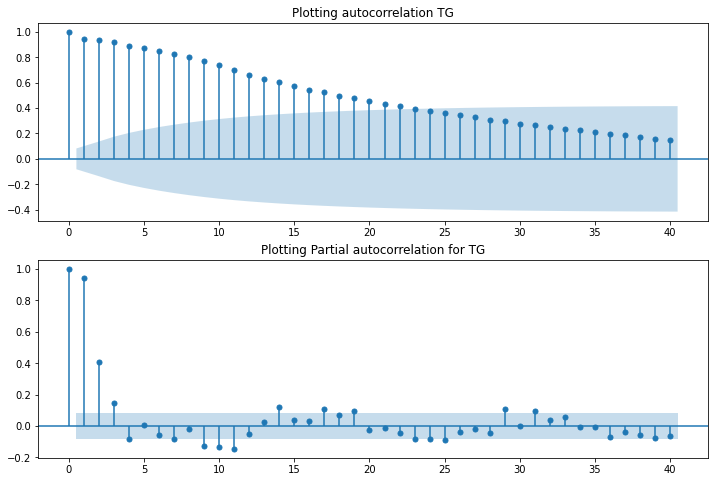

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------


In [34]:
for cols in ['AN','CH','HR','TG']:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(71)
    test=repeat_adfuller_test_cols_transformed(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('Plotting autocorrelation and partial autocorrelation for ',cols)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data_frame[cols],lags=40,ax=ax1,title='Plotting autocorrelation '+cols)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data_frame[cols],lags=40,ax=ax2,title='Plotting Partial autocorrelation for '+cols)
    plt.show()
    print('-----------------------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------------------')